<a href="https://colab.research.google.com/github/C8rr3d8rr/C8rr3d8rr/blob/main/Proyecto_Arbol_Decision_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt  #biblioteca para creacion de graficos
import numpy             as np               #funciones de cálculo matemático
import pandas            as pd               #libreria para apoyo en manejo de datos
from sklearn.model_selection import train_test_split  #libreria util para mineria de datos y ML
from sklearn.tree            import DecisionTreeRegressor
from sklearn.tree            import plot_tree
from sklearn.tree            import export_graphviz
from sklearn.tree            import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import mean_squared_error

In [ ]:
#Cargar los datos de drive
from google.colab import files
from google.colab import drive

In [ ]:
ruta="/content/drive/MyDrive/Colab Notebooks/Universidad/Dataset_Ingresos_Costos.xlsx"
df = pd.read_excel(ruta)
df.shape
df.head(4)
#df.describe()

,fecha,tipo,nit,tercero,idregional,idsubcentro,idlinea_producto,nombre_de_la_cuenta,ingreso,costos,impuesto,segmento,cadena_de_empresas,condiciones_de_pago
0,2023-04-30,Ingreso,1038626431,DANIELA GRANADA BEDOYA,12,1047,TU01,MERCANCIAS EXCLUIDAS,-134736,0,0.00,AGUA,PET SHOP,CREDITO
1,2023-04-30,Ingreso,1038626431,DANIELA GRANADA BEDOYA,12,1047,TU01,MERCANCIAS GRAVADAS 5%,134736,0,6736.80,AGUA,PET SHOP,CREDITO
2,2023-04-30,Ingreso,1010192780,DIEGO ALEJANDRO CASTRO CIFUENTES,16,1019,CS01,DESCUENTOS MERC. GRAVADAS 19%,1416,0,269.04,TIERRA,PET SHOP,CREDITO
3,2023-04-30,Ingreso,1010192780,DIEGO ALEJANDRO CASTRO CIFUENTES,16,1019,CS01,DTO DEVOLUCIONES MERCANCIAS GRAVADAS 19%,-1416,0,-269.04,TIERRA,PET SHOP,CREDITO


In [ ]:
#Seleccion de las columnas de interes
columnas_interes=['idregional','idsubcentro']
datos_selecc=df[columnas_interes]
datos_selecc.head(3)
datos_selecc.describe()

,idregional,idsubcentro
count,943014.000000,943014.000000
mean,12.764169,1020.061159
std,2.166204,294.549201
min,10.000000,1001.000000
25%,11.000000,1003.000000
50%,12.000000,1004.000000
75%,14.000000,1016.000000
max,17.000000,9999.000000


In [ ]:
 # siempre que se utiliza un modelo predictivo, se requiere dividir los datos
   # en dos partes: una de entrenamiento(train) y otra de pueba (test), tipicamente son
   # 75% u 80% para el entramiento y unos 25% o 20% para la prueba.
   #Variable respuesta SALES y Variable predictora QUANTITY_ORDERED
X_train, X_test, y_train, y_test = train_test_split(datos_selecc.drop(columns = "idsubcentro"),datos_selecc['idsubcentro'],train_size=0.75,random_state=0)


In [ ]:
X_train.info() #información de la tabla de entrenamiento
   #y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 707260 entries, 593534 to 305711
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   idregional  707260 non-null  int64
dtypes: int64(1)
memory usage: 10.8 MB


In [ ]:
#Creación del modelo del árbol de decisión
   #El parámetro max_depth determina la profundidad (niveles) del arbol de decisión
   #modelo = DecisionTreeRegressor(max_depth= 3,random_state = 42)
modelo = DecisionTreeRegressor(max_depth= 3,random_state = 0)

In [ ]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train) #se aplica el comando fit al objeto llamado "modelo"

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
datos_selecc.describe()

,idregional,idsubcentro
count,943014.000000,943014.000000
mean,12.764169,1020.061159
std,2.166204,294.549201
min,10.000000,1001.000000
25%,11.000000,1003.000000
50%,12.000000,1004.000000
75%,14.000000,1016.000000
max,17.000000,9999.000000


Profundidad del árbol:   3
Número de nodos terminales: 6


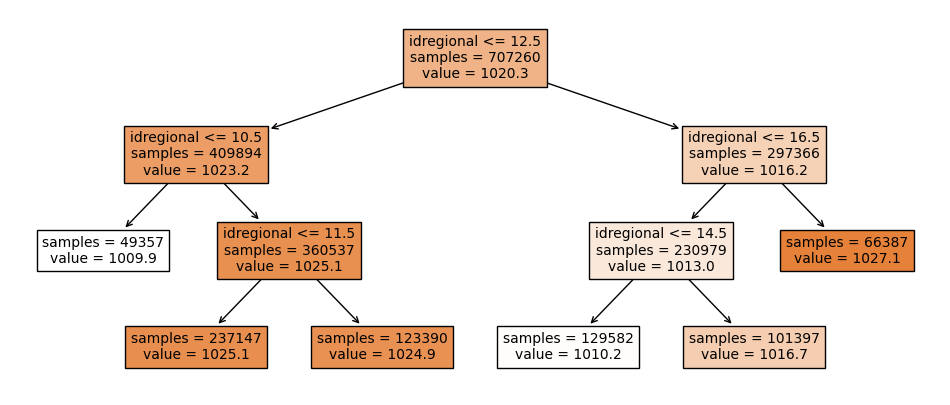

In [ ]:
#Nota: En el AD, las flechas del lado izquierdo pertencen a la respuesta "Verdadero"
#las flechas del lado derecho pertencen a la respuesta "Falso"
fig, ax = plt.subplots(figsize=(12, 5)) #crea figura con un tamañano específico
print(f"Profundidad del árbol:   {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos_selecc.drop(columns = "idsubcentro").columns,
            class_names   = 'idsubcentro',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 1,
            ax            = ax
)

In [ ]:
fig.savefig("Arbol_Decision1.png")